# PCA Ïã§Ïäµ 1. Iris dataset

</br>

## --‚ñ∂ Dataset Load

In [10]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0

## --‚ñ∂ Featrue ÌôïÏù∏

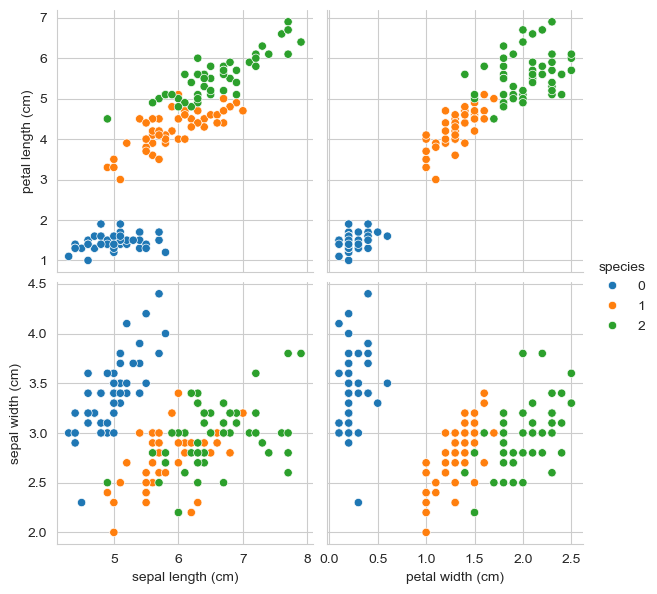

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore', category=UserWarning)

sns.set_style('whitegrid')


sns.pairplot(
	iris_df, hue='species', palette='tab10', height=3,
	x_vars=['sepal length (cm)', 'petal width (cm)'],
	y_vars=['petal length (cm)', 'sepal width (cm)']
);

## --‚ñ∂ Scaler Ï†ÅÏö©

In [12]:
from sklearn.preprocessing import StandardScaler

iris_ss = StandardScaler().fit_transform(iris.data)
iris_ss[:3]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ]])

## --‚ñ∂ PCA

- 4Í∞úÏùò ÌäπÏÑ±ÏùÑ 2Í∞úÏùò ÌäπÏÑ±ÏúºÎ°ú Ï†ïÎ¶¨ <br></br>

#### ‚óæ `get_pca_data()`

- PCA Í≤∞Í≥ºÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò

In [13]:
from sklearn.decomposition import PCA

def get_pca_data(ss_data, n_components=2):
    pca = PCA(n_components=n_components)
    pca.fit(ss_data)
    
    return pca.transform(ss_data), pca

In [14]:
iris_pca, pca = get_pca_data(iris_ss, 2)
iris_pca.shape

(150, 2)

In [15]:
pca.mean_

array([-1.69031455e-15, -1.84297022e-15, -1.69864123e-15, -1.40924309e-15])

In [16]:
pca.components_ #--> 2Í∞úÏùò VectorÏóê Í∞ÅÍ∞Å ÏöîÏÜåÎäî 4Í∞ú

array([[ 0.52106591, -0.26934744,  0.5804131 ,  0.56485654],
       [ 0.37741762,  0.92329566,  0.02449161,  0.06694199]])

#### ‚óæ get_pd_from_pca()

- PCA Í≤∞Í≥ºÎ•º Pandas.DataFrameÏúºÎ°ú Ï†ïÎ¶¨ÌïòÎäî Ìï®Ïàò

In [17]:
def get_pd_from_pca(pca_data, cols=['pca_component_1','pca_component_2']):
    return pd.DataFrame(pca_data, columns=cols)

In [18]:
iris_pd_pca = get_pd_from_pca(iris_pca)
iris_pd_pca['species'] = iris.target
iris_pd_pca.head()

pca_component_1  pca_component_2  species
0        -2.264703         0.480027        0
1        -2.080961        -0.674134        0
2        -2.364229        -0.341908        0
3        -2.299384        -0.597395        0
4        -2.389842         0.646835        0

#### ‚óæ Ï£ºÏÑ±Î∂Ñ ÌôïÏù∏

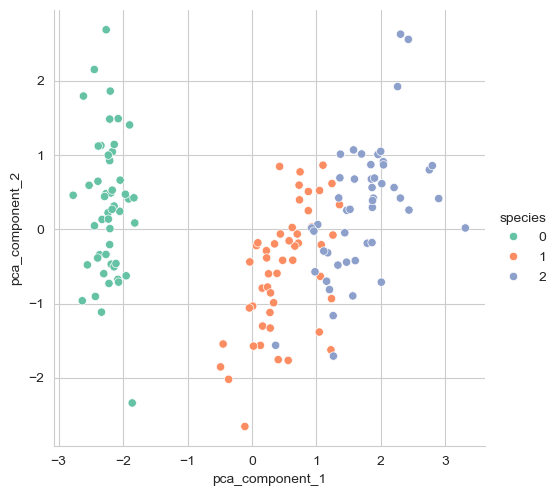

In [21]:
sns.pairplot(
	iris_pd_pca, hue='species', palette='Set2', height=5,
	x_vars=['pca_component_1'],
	y_vars=['pca_component_2']
);

## --‚ñ∂ Modeling : Random Forest

### ‚óæ rf_scores()

- Random Forest ModelÏùÑ K=5Î°ú ÍµêÏ∞®Í≤ÄÏ†ïÌïú ÌõÑ Accuracy ScoreÎ•º Î∞òÌôòÌïòÎäî Ìï®Ïàò

In [24]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

def rf_scores(X, y, cv=5):
    rf = RandomForestClassifier(n_estimators=100, random_state=13)
    scores_rf = cross_val_score(rf, X, y, scoring='accuracy', cv=cv)
    
    print('Score :', np.mean(scores_rf))


### üìç Originer 4 Features

- 4Í∞úÏùò ÌäπÏÑ±ÏùÑ Î™®Îëê ÏÇ¨Ïö©Ìï¥ÏÑú Random Forest Ï†ÅÏö©

In [25]:
rf_scores(iris_ss, iris.target)

Score : 0.96


### üìç PCA 2 Features

- Ï£ºÏÑ±Î∂ÑÎ∂ÑÏÑùÏúºÎ°ú ÏñªÏùÄ 2Í∞úÏùò ÌäπÏÑ±ÏùÑ ÏÇ¨Ïö©Ìï¥ÏÑú Random Forest Ï†ÅÏö©

In [26]:
pca_X = iris_pd_pca[['pca_component_1','pca_component_2']]

rf_scores(pca_X, iris.target)

Score : 0.9066666666666666
